# Lineare Abbildungen

In diesem Notebook sollen Sie das Wissen, das Sie über Matrizen kennengelernt haben, anwenden und erweitern.
$\newcommand{\Ima}{\text{Im }}$


<b> Python Grundlagen: </b>  Varibalen, Kontrollstrukturen, Umgang mit NumPy<br>
<b> Math. Grundlagen: </b> Körper, Vektoren, Vektorräume, lineare Abbildungen, Basen, Matrizen <br>

<ul>
 <li><a href="#1">Einstieg</a></li>
 <li><a href="#2">Eigenschaften linearer Abbildung</a></li>
 <li><a href="#3">Der Zusammenhang zu Matrizen</a></li>
<li><a href="#4">Beispiele linearer Abbildungen in der Ebene</a></li>
    <ul>
    <li><a href="#3.1">Die Scherung entlang einer Achse</a></li>
    <li><a href="#3.2">Die Drehung um einen Winkel</a></li>
    <li><a href="#3.3">Die Verschiebung in Richtung eines Vektors</a></li>
    </ul>
</ul>

In [13]:
# Import von benötigten Modulen
%pip install -q ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from ipywidgets import interactive, FloatSlider
import math

## Einstieg <a id="1"></a>
Sie wissen bereits, was eine lineare Abbildung ist. Das ist eine Abbildung (oder Funktion) $F$ zwischen zwei endlich dimensionalen $K$-Vektorräumen $V$ und $W$ ist, die jedem Vektor $v \in V$ genau ein $w \in W$ zuordnet und zwar so, dass Linearität der Abbildung erhalten bleibt, d.h. es gilt: $$F(v+w)=F(v)+F(w) \text{ und } F(\lambda v)=\lambda F(v)$$ für alle $v\in V$, $w\in W$ und $\lambda \in K$. Anschaulich werden also Vektoren auf Vektoren abgebildet, sodass die zugrundeliegende Struktur der Vektorräume erhalten bleibt. 

<center><img src="LinAbb2.png"  width="40%" height="40%"></center> 

Hier werden also die Vektoren $v_1$ bzw. $v_2$ im $\mathbb{R}^2$ unter einer linearen Abbildung $F$ auf $w_1$ bzw. $w_2$ abgebildet.


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 1</b>  </p> 

Prüfen Sie nach, ob es sich bei den folgenden Abbildungen um lineare Abbildungen handelt oder nicht. Geben Sie in den entsprechenden Code-Zellen über <code>True/False</code> an, welcher Fall vorliegt und prüfen Sie Ihre Eingabe. Geben Sie zusätzlich im Fall von <code>False</code> zwei Vektoren $x,y \in \mathbb{R}^2$ an, die die Linearität verletzen und ergänzen Sie den Code an den markierten Stellen.

$$ \text{a)} \quad F \colon \mathbb{R}^2 \longrightarrow \mathbb{R}^3, \begin{pmatrix*}[r] x_1\\x_2\end{pmatrix*}\mapsto \begin{pmatrix*}[c] x_1x_2\\x_2\\x_1\end{pmatrix*}, \quad \quad\text{b)} \quad F \colon \mathbb{R}^2 \longrightarrow \mathbb{R}^2, \begin{pmatrix*}[r] x_1\\x_2\end{pmatrix*}\mapsto \begin{pmatrix*}[c] 2x_1+4x_2\\3x_1+x_2\end{pmatrix*} $$


In [3]:
# Teilaufgabe a) und b)

linear = # Legen Sie hier fest, ob die Abbildung aus a) bzw. b) linear ist

x1 = np.array([1, 1])  # Diese Vektoren benötigen Sie
x2 = np.array([1, 0])

# Führen Sie anschließend untere Zellen aus:

In [ ]:
# Überprüfung der Ergebnisse aus a)
print(
    "Die Abbildung F ist nicht linear, also ist False korrekt. Ihre Antwort:",
    linear,
    "\n",
)


def F(x):  # Definieren Sie hier eine Funktion F, die den Vektor x auf F(x) wie angegeben abbildet und geben Sie das Ergebnis zurück
    x_1 = x[0]
    x_2 = x[1]
    f_x = np.array([x_1 * x_2, x_1, x_2])

    return f_x

sum_first = F(x1 + x2)
sum_later = F(x1) + F(x2)

if not np.array_equal(sum_first, sum_later):
    print("Die Vektoren x und y verletzen die Linearität, korrekt. Es ist F(x + y) =", sum_first,", aber F(x) + F(y) =",sum_later)
else:
    print("Die Vektoren x und y verletzen die Linearität nicht! Es ist F(x + y) =",sum_first,"und F(x) + F(y) =",sum_later)

In [ ]:
# Überprüfung der Ergebnisse aus b)
print("Die Abbildung F ist linear, also ist True korrekt. Ihre Antwort:", linear, "\n")

## Eigenschaften linearer Abbildungen <a id="2"></a>

Liegt eine lineare Abbildung $F \colon V \longrightarrow W$ vor, so kennen Sie die Untervektorräume $\ker F$, der Kern von $F$ und $\Ima F$ als das Bild von $F$.
Im Folgenden sollen Sie beispielhaft Vektoren aus Bild und Kern bestimmen, weshalb nochmal daran erinnert sei, dass eine <i>Basis</i> eines Vektorraums $U \neq \lbrace 0\rbrace $ ein linear unabhängiges Erzeugendensystem ist. 


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 2</b>  </p> 
    
<b>Teilaufgabe a)</b> Schreiben Sie eine Funktion <code>linInd</code>, die drei Vektoren $ x_1,x_2,x_3 \in \mathbb{R}^3$ auf lineare Unabhängigkeit prüft. <hr>

<b>Teilaufgabe b)</b>  Gegeben sei die lineare Abbildung $F \colon \mathbb{R}^2 \longrightarrow  \mathbb{R}^2, \begin{pmatrix*}[r] x_1\\x_2\end{pmatrix*}\mapsto \begin{pmatrix*}[c] -2x_1-2x_2\\x_1+x_2\end{pmatrix*}$. Bestimmen Sie Vektoren $ v \in \ker F $ und $ w \in \Ima F $ und prüfen Sie mithilfe der Eingabe Ihr Ergebnis.

In [8]:
# Teilaufgabe 1


def linInd(x_1, x_2, x_3):
    A = np.array(
        [x_1, x_2, x_3]
    )  # Setzen sie die drei Vektoren als Matrix fest. Was ist dann zu tun?

    ...

    if ...:
        return r"Die Vektoren $x_1$, $x_2$ und $x_3$ sind linear unabhängig."
    else:
        return r"Die Vektoren $x_1$, $x_2$ und $x_3$ sind linear abhängig."


# Testen Sie ihre Funktion auf Richtigkeit!
x_1 = np.array([0, 0, 0])
x_2 = np.array([6, 2, 7])
x_3 = np.array([1, 2, 1])

result = linInd(x_1, x_2, x_3)
display(Latex(result))

<IPython.core.display.Latex object>

In [ ]:
# Teilaufgabe 2

def F(x):

    x_1 = x[0]
    x_2 = x[1]

    return np.array([-2 * x_1 - 2 * x_2, x_1 + x_2])


def checkImF(x):
    c_1 = x[0] / (-2)
    c_2 = x[1]

    if c_1 == c_2:
        return True

# Legen Sie hier die Vektoren für v und w fest
v = 
w = 
text = r""

# Die nachfolgenden Codezeilen müssen Sie nicht nachvollziehen!
if np.array_equal(F(v), np.array([0, 0])):
    text += r"Der Vektor $v$ liegt im Kern."
else:
    text += r"Der Vektor $v$ liegt <i>nicht</i> im Kern."

if checkImF(w):
    text += r" Der Vektor $w$ liegt im Bild von $F$."
else:
    text += r" Der Vektor $w$ liegt <i>nicht</i> im Bild von $F$."
display(Latex(text))

## Der Zusammenhang zu Matrizen <a id="3"></a>

Sind für $V$ und $W$ erst einmal Basen festgelegt worden, so kann man die Abbildung auch mithilfe der Abbildungsmatrix $A$ verstehen, die spaltenweise die Bilder der Basisvektoren aus $V$ trägt. Das ermöglicht es, viele der bekannten Gesetze für Matrizen auf lineare Abbildungen zu übertragen:  Zum Beispiel bei der Addition $F+G$ oder Komposition $F \circ G$ zweier linearer Abbildungen $F$ bzw. $G$ mit Abbildungsmatrizen $A$ bzw. $B$. ist die Abbildungsmatrix einfach die Summe der Matrizen $A+B$ oder das Produkt $BA$. Weiterhin ist $F$ invertierbar, wenn $A$ invertierbar ist. 

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 3</b>  </p> 
    
<b>Teilaufgabe a)</b> Gegeben sei eine lineare Funktion $F \colon \Reals^2 \longrightarrow \Reals^3$. Schreiben Sie eine Funktion <code>AbbMat</code>, die die Abbildungsmatrix von $F$ bezüglich der Standardbasis zurückgibt. <hr>

<b>Teilaufgabe b)</b> Die lineare Abbildung $F \colon \Reals^2 \longrightarrow \Reals^2, \begin{pmatrix*}[r] x_1\\x_2\end{pmatrix*}\mapsto \begin{pmatrix*}[r] 2 & 5 \\ 1 & 3\end{pmatrix*}\cdot \begin{pmatrix*}[r] x_1\\x_2\end{pmatrix*}$ ist invertierbar. Geben Sie die Abbildungsmatrix der Inversen $F^{-1}$ an und überprüfen Sie Ihre Eingabe.

In [ ]:
# Teilaufgabe a)

def AbbMat(F):
    ... # Schreiben Sie hier Ihren Code rein

In [12]:
# Teilaufgabe b)
matrix_F = np.array([[2, 5], [1, 3]])
matrix_F_inv = np.array([[1, 0], [0, 1]])

# Sie müssen die nachfolgende Codezeilen nicht nachvollziehen!
if np.array_equal(matrix_F_inv, np.linalg.inv(matrix_F)):
    print(True)
else:
    print(False)

False


## Beispiele linearer Abbildungen in der Ebene $\mathbb{R}^2$ <a id="4"></a>

Im Folgenden sollen Sie verschiedene Beispiele linearer Abbildungen im $\Reals^2$ kennenlernen.
Betrachten Sie zum Anfang die lineare Abbildung $F$, dessen Bilder der Standardbasis $e_1 = \begin{pmatrix*}[c] 1\\0\end{pmatrix*}, e_2 = \begin{pmatrix*}[c] 0\\1\end{pmatrix*}$ gegeben sind durch $$ F(e_1) = \begin{pmatrix*}[c] 2\\0\end{pmatrix*}, \quad F(e_2) = \begin{pmatrix*}[c] 0\\1\end{pmatrix*}.$$ Was sagt Ihnen das über die Abbildung $F$ aus? Was passiert mit Figuren in der Ebene unter der Abbildung $F$? Denken Sie zunächst darüber nach, bevor Sie die folgende Code-Zelle ausführen.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

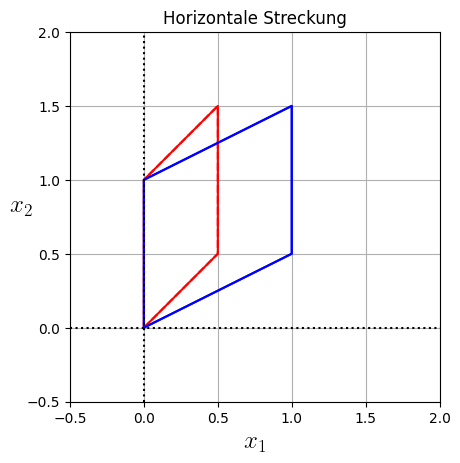

In [3]:
# Code-Zelle zur Visualisierung ausführen
text = r"$F \colon \Reals^2 \longrightarrow \Reals^2, \quad F(e_1) = \begin{pmatrix*}[c] 2\\0\end{pmatrix*}, \quad F(e_2) = \begin{pmatrix*}[c] 0\\1\end{pmatrix*}$. Der erste Basisvektor $e_1$ wird also in Richtung $x_1$-Achse verdoppelt. Entsprechend wird unter der linearen Abbildung $F$ also <i>jede</i> Figur horizontal um den Faktor 2 gestreckt, konkret wird das rote Parallelogramm als Figur auf das Blaue abgebildet."
display(Latex(text))

punkteFigur = np.array([[0, 0], [0.5, 0.5], [0.5, 1.5], [0, 1], [0, 0]])
punkteFigur = punkteFigur.transpose()
punkteFigur
x1 = punkteFigur[0, :]
x2 = punkteFigur[1, :]

A = np.array([[2, 0], [0, 1]])
bildpunkteFigur = A @ punkteFigur
x_F = bildpunkteFigur[0, :]
y_F = bildpunkteFigur[1, :]

fig, ax = plt.subplots()

ax.set_xlabel("$x_1$", usetex=False, fontsize=18)
ax.set_ylabel("$x_2$", usetex=False, fontsize=18, rotation=0)
ax.plot(x1, x2, "r")
ax.plot(x_F, y_F, "b")
ax.plot(x1, x2, "r", ls="dashed")
ax.plot(x_F, y_F, "b")
ax.axvline(x=0, color="k", ls=":")
ax.axhline(y=0, color="k", ls=":")
ax.grid(True)
ax.axis([-0.5, 2, -0.5, 2])
ax.set_aspect("equal")
ax.set_title("Horizontale Streckung")

text = r"Insgesamt liegt die Abbildungsmatrix $A = \begin{pmatrix*}[c] 2 & 0 \\0 & 1\end{pmatrix*}$ vor."
display(Latex(text))

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 4</b>  </p> 

<b> Horizontale und vertikale Streckung </b><br><br>
Nun sollen Sie sich eine lineare Abbildung zusammenstellen, die einen jeden Vektor $v$ horizontal um einen Faktor $k_1 \in \Reals $ und vertikal um einen Faktor $k_2 \in \Reals $ streckt. Gehen Sie dabei wie folgt vor:

<b>Teilaufgabe a)</b> Schreiben Sie zunächst eine Funktion <code>scale</code>, die besagte lineare Abbildung darstellen soll. Ihr werden die Streckparameter $k_1$ und $k_2$ übergeben, worauf die Abbildungsmatrix $A(k_1,k_2)$ zurückgegeben wird. <hr>

<b>Teilaufgabe b)</b> Ergänzen Sie anschließend die Funktion <code>application</code> in der darauffolgenden Code-Zelle, die die ebene Figur eines Fisches unter der linearen Abbildung abändert. Nutzen Sie die dabei erzeugten Slider, um zu überprüfen, ob die Figur entlang den Achsen entsprechend gestreckt wird. <hr>

<b>Teilaufgabe c)</b> Welcher Effekt tritt zusätzlich auf, wenn ein Streckfaktor negativ ist? Notieren Sie Ihre Beobachtungen.

In [9]:
def scale(k1, k2):
    ... # Schreiben Sie hier Ihren Code hin

In [ ]:
# Teilaufgabe b) Führen Sie diese Zelle aus, um die Funktion scale() auf RIchtigkeit zu überprüfen
def application(k1, k2):
    fig, ax = plt.subplots()
    x_points = np.array([0, 1, 2.5, 3, 3.5, 3.5, 3, 2.5, 1, 0])
    y_points = np.array([0, 1, 1, 0, 1, -1, 0, -1, -1, 0])

    matrix = scale(k1, k2)
    x_points_scale, y_points_scale = matrix.dot([x_points, y_points])
    size = len(x_points)
    for i in range(size):
        ax.plot(
            [x_points_scale[i], x_points_scale[(i + 1) % size]],
            [y_points_scale[i], y_points_scale[(i + 1) % size]],
            linewidth=0.7,
        )

    plt.ylim([-5, 5])
    plt.xlim([-5, 10])
    ax.axvline(x=0, color="k", ls=":")
    ax.axhline(y=0, color="k", ls=":")
    print("Die Abbildungsmatrix ist A =\n", np.array([[k1, 0], [0, k2]]))
    plt.show()

# Die nachfolgenden Codezeilen müssen Sie nicht nachvollziehen!
display(
    Latex(
        r"Die Abbildungsmatrix ist $ A = \begin{pmatrix} k_1  & 0 \\ 0 & k_2\end{pmatrix}$"
    )
)
interactive(
    application,
    k1=(
        -1.25,
        2.75,
        0.25,
    ),
    k2=(
        -1,
        4,
        0.25,
    ),
)

### Scherung entlang der $x_1$-Achse <a id="3.1"></a>

Auch die Scherung in der Ebene ist elementar anhand der Bilder der Standardbasisvektoren zu verstehen. Führen Sie zunächst die Code-Zelle aus.

Text(0.5, 1.0, 'Scherung entlang der $x_1$-Achse')

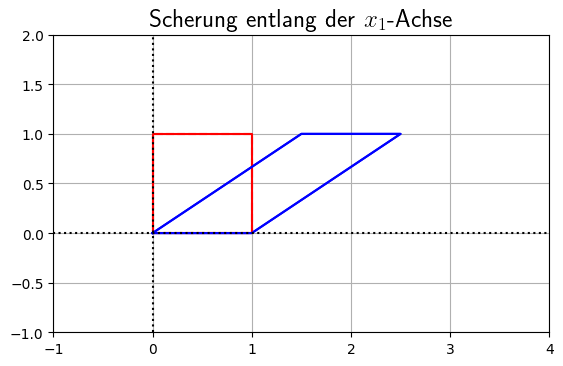

In [11]:
# Code-Zelle ausführen

coords = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
coords = coords.transpose()
coords
x1 = coords[0, :]
y = coords[1, :]

S = np.array([[1, 1.5], [0, 1]])
S_coords = S @ coords

x_D = S_coords[0, :]
y_D = S_coords[1, :]

fig, ax = plt.subplots()
ax.plot(x1, y, "r")
ax.plot(x_D, y_D, "b")
ax.plot(x1, y, "r", ls="--")
ax.plot(x_D, y_D, "b")
ax.axvline(x=0, color="k", ls=":")
ax.axhline(y=0, color="k", ls=":")
ax.grid(True)
ax.axis([-1, 4, -1, 2])
ax.set_aspect("equal")
ax.set_title("Scherung entlang der $x_1$-Achse", usetex=False, fontsize=18)

Bei einer Scherung $S$ bleibt jeder Punkt entlang der Scherungsachse unverändert und jeder andere Punkt wird um einen festen Winkel $\alpha$ (gemessen zum Lot) parallel zur Scherungsachse verschoben. In der nächsten Abbildung ist dies.

<center><img src="Scherung.png"  width="40%" height="40%"></center><br>


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 6</b>  </p> 

<b>Teilaufgabe a)</b> Sie sollen eine Scherung $S$ entlang der $x_1$-Achse zu einem festen Winkel $\alpha \in (0,\frac{\pi}{2})$ als lineare Abbildung konstruieren. Leiten Sie sich anhand der Skizze her, wie die Abbildungsmatrix auszusehen hat. Anschließend schreiben Sie eine Funktion <code>shear</code>, die einen beliebigen Punkt $(x_1, x_2)$ unter $S$ abbildet. Testen Sie anschließend Ihre Funktion anhand der Punkte $(1,1), (2,5)$ und $(3,0)$ und dem Winkel $\alpha = \frac{\pi}{4}.$ <br><br>
Zur Kontrolle: $S((1,1)) = (2,1), \; S((2,5))= (7,5) \;$ und $\; S((3,0)) = (3,0)$. <hr>

<b>Teilaufgabe a)</b> Ergänzen Sie die Code-Zelle im zweiten Teil, sodass wie zuvor die ebene Figur eines Fischs entlang der $x_1$-Achse um $\alpha$ geschert wird.

In [12]:
# Teilaufgabe 1
def shear(x1, x2, alpha):
    v = # legen Sie hier einen Vektor v fest mit Koordinaten x1, x2

    S = # Wie lautet die Matrix der Scherung?

    return ... # Geben Sie hier den Bildvektor zurück


# Testen Sie hier ihre FUnktion shear()
P = (3, 0)

result = shear(P[0], P[1], np.pi / 4)
result = np.round(result, 5)

text = r"Der Punkt $P = ({P1}, {P2})$ wird unter der Scherung $S$ auf den Punkt  $P^\prime = ({P1_S}, {P2_S})$ abgebildet".format(
    P1=P[0], P2=P[1], P1_S=result[0], P2_S=result[1]
)
display(Latex(text))

<IPython.core.display.Latex object>

In [ ]:
# Teilaufgabe 2


def application(alpha):
    fig, ax = plt.subplots()  
    x_points = np.array([0, 1, 2.5, 3, 3.5, 3.5, 3, 2.5, 1, 0])
    y_points = np.array([0, 1, 1, 0, 1, -1, 0, -1, -1, 0])

    x_points_S, y_points_S = ... # Wie müssen die Bildpunkte aussehen?

    size = len(...)

    for i in ... :
        ax.plot(
            [x_points_S[i], x_points_S[(i + 1) % size]],
            [y_points_S[i], y_points_S[(i + 1) % size]],
            linewidth=1.8,
        )

    plt.ylim([-2, 3])
    plt.xlim([-2, 8])
    ax.axvline(x=0, color="k", ls="dashed")
    ax.axhline(y=0, color="k", ls="dashed")
    print("Der Scherungswinkel ist alpha = {a} mit der Abbildungsmatrix A =\n ".format(a=alpha),
        np.array([[..., ...], [..., ...]]), # Wie lauten die EInträge der Schermatrix? Beziehen Sie sich auf Teilaufgbae a)
    )
    plt.show()


display(
    Latex(
        r"Der Scherungswinkel $\alpha$ gibt die Abbildungsmatrix  $A = \begin{pmatrix} 1  & \tan(\alpha) \\ 0 & 1\end{pmatrix}$"
    )
)
interactive(application, alpha=FloatSlider(min=0, max=np.pi / 2, step=0.01, value=0))

### Drehung um einen Winkel $\theta$ <a id="3.2"></a>

In der Methode zur Scherung sind Sie schon auf die Drehung aufmerksam geworden. In diesem Abschnitt sollen Sie sich ebenfalls die Drehung eines Punktes um einen Winkel $\theta$ entgegen des Uhrzeigersinns herleiten, die, wie sich herausstellt, eine lineare Abbildung darstellt. Nutzen Sie die Code-Zelle, um die Abbildungsmatrix der Drehung zu erarbeiten.

Text(0.5, 1.0, 'Drehung um den Winkel $\\theta$')

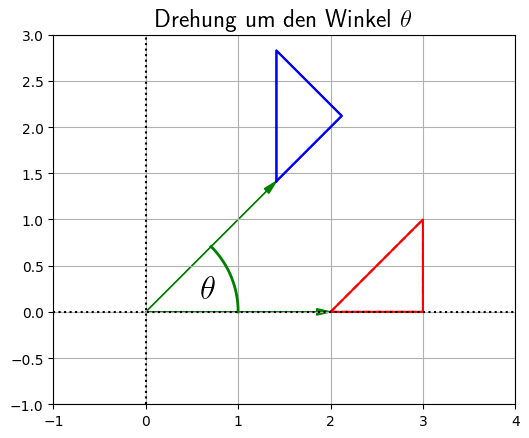

In [6]:
# Code-Zelle ausführen...

coords = np.array([[2, 0], [3, 0], [3, 1], [2, 0]])
coords = coords.transpose()
coords
x1 = coords[0, :]
y = coords[1, :]

S = np.array([[np.sqrt(2) / 2, -np.sqrt(2) / 2], [np.sqrt(2) / 2, np.sqrt(2) / 2]])
S_coords = S @ coords

x_D = S_coords[0, :]
y_D = S_coords[1, :]


fig, ax = plt.subplots()
ax.plot(x1, y, "r")
ax.plot(x_D, y_D, "b")
ax.plot(x1, y, "r", ls="--")
ax.plot(x_D, y_D, "b")


arc_angles = np.linspace(0 * np.pi, np.pi / 4, 20)
arc_xs = np.cos(arc_angles)
arc_ys = np.sin(arc_angles)

plt.plot(arc_xs, arc_ys, color="green", lw=2)
ax.axvline(x=0, color="k", ls=":")
ax.axhline(y=0, color="k", ls=":")
options = {"head_width": 0.07, "head_length": 0.15, "length_includes_head": True}
ax.arrow(0, 0, 2, 0, fc="g", ec="g", **options)
ax.arrow(0, 0, np.sqrt(2), np.sqrt(2), fc="g", ec="g", **options)
ax.text(0.6, 0.15, "$\\theta$", usetex=False, fontsize=24)
ax.grid(True)
ax.axis([-1, 4, -1, 3])
ax.set_aspect("equal")
ax.set_title("Drehung um den Winkel $\\theta$", usetex=False, fontsize=18)

Implementieren Sie nun die Drehung in Python:

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 7</b>  </p> 

<b>Teilaufgabe a)</b> Schreiben Sie eine Methode <code>rotate</code>, die einen Vektor $v \in \Reals^2$ um den Winkel $\theta \in \left[0, 2\pi \right)$ dreht. <hr>

<b>Teilaufgabe b)</b>  Ergänzen Sie die Code-Zellen in der Methode <code>application</code> an den entsprechenden Stellen, sodass auch der Fisch als ebene Figur um $\theta$ gedreht wird.


In [15]:
def rotate(v, theta):
    ... # Ergänzen Sie hier Ihren Code

In [ ]:
def application(theta):
    fig, ax = plt.subplots() 
    x_points = np.array([0, 1, 2.5, 3, 3.5, 3.5, 3, 2.5, 1, 0])
    y_points = np.array([0, 1, 1, 0, 1, -1, 0, -1, -1, 0])
    
    bildpunkte = ... # Wie lauten Bildpunkte?

    x_points, y_points = ... # Extrahieren Sie die Bildpunkte und speichern Sie diese in x_points, y_points

    size = len(...) # Durchlaufen Sie mit size geschickt die Bildpunkte durch

    for i in ... :
        ax.plot(
            [x_points[i], x_points[(i + 1) % size]],
            [y_points[i], y_points[(i + 1) % size]],
            linewidth=1.8,
        )

    plt.ylim([-5, 5])
    plt.xlim([-5, 5])
    ax.axvline(x=0, color="k", ls="dashed")
    ax.axhline(y=0, color="k", ls="dashed")
    print(
        "Die Drehmatrix lautet  A = \n",
        np.array(
            [[np.cos(theta), (-1) * np.sin(theta)], [np.sin(theta), np.cos(theta)]]
        ),
    )
    plt.show()


display(
    Latex(
        r"Die Drehmatrix lautet $A = \begin{pmatrix*}[r] \cos(\theta)  & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix*}$"
    )
)
interactive(application, theta=(0, 2 * np.pi, 0.01))

### Verschiebung in Richtung eines Vektors $v \neq 0$ <a id="3.3"></a>

Es mag zunächst verblüffen, warum man bei einer Verschiebung (Translation) von einer linearen Abbildung spricht. Schauen Sie sich zunächst die Translation visuell an. Die ebene Figur, die den Buchstaben L darstellt, wird in Richtung des Vektors $ v = \begin{pmatrix*}[c] 3\\1\end{pmatrix*}$ verschoben.

Text(0.5, 1.0, 'Translation')

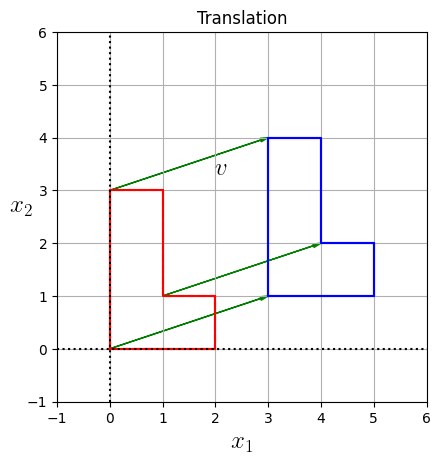

In [7]:
# Führen Sie diese Zelle aus

coords = np.array([[0, 0], [0, 3], [1, 3], [1, 1], [2, 1], [2, 0], [0, 0]])
coords = coords.transpose()

x1 = coords[0, :]
x2 = coords[1, :]

x_translated = np.copy(x1)
y_translated = np.copy(x2)

for i in range(x1.shape[0]):
    x_translated[i] += 3
    y_translated[i] += 1


fig, ax = plt.subplots()

ax.set_xlabel("$x_1$", usetex=False, fontsize=18)
ax.set_ylabel("$x_2$", usetex=False, fontsize=18, rotation=0)
ax.plot(x1, x2, "r")
ax.plot(x_translated, y_translated, "b")
options = {"head_width": 0.07, "head_length": 0.15, "length_includes_head": True}
ax.arrow(0, 0, 3, 1, fc="g", ec="g", **options)
ax.arrow(1, 1, 3, 1, fc="g", ec="g", **options)
ax.arrow(0, 3, 3, 1, fc="g", ec="g", **options)
ax.text(2, 3.3, "$v$", usetex=False, fontsize=18)
ax.plot(x1, x2, "r", ls="--")
ax.plot(x_translated, y_translated, "b")
ax.axvline(x=0, color="k", ls=":")
ax.axhline(y=0, color="k", ls=":")
ax.grid(True)
ax.axis([-1, 6, -1, 6])
ax.set_aspect("equal")
ax.set_title("Translation")

Bei einer Verschiebung um einen beliebigen Vektor $v \neq 0 \in \Reals^2$ kann es sich aber um keine lineare Abbildung handeln, denn wäre $F$ solch eine, so müsste $$ 0 = F(0) = 0 + v = v \neq 0$$ gelten, was einen Widerspruch erzeugt. Wie ist eine Verschiebung dann zu verstehen? Nun, dafür muss man einen kleinen Trick verwenden. Damit eine Verschiebung in der Ebene als lineare Abbildung Sinn ergibt, müssen Sie sich die Ebene des $\Reals ^2$ in dem $\Reals^3$ vorstellen, z.B. als parallele $x_1-x_2-$ Ebene. Jeder Punkt $(x_1,x_2) \in \Reals^2$ ist dann zu verstehen als $(x_1,x_2,1) \in \Reals^3$, wobei insbesondere $x_3 = 1$ zu beachten ist. Dann sei eine lineare Abbildung  $ F \colon \Reals^3 \longrightarrow \Reals^3 $ definiert durch 

$$ F_{trl}(x_1,x_2,x_3) = \begin{pmatrix*}[r] 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{pmatrix*} \cdot \begin{pmatrix*}[r] x_1\\x_2\\x_3 \end{pmatrix*}.$$

Was können Sie beobachten, wenn der Punkt $(x_1,x_2,1)$ unter $F$ abgebildet wird? Nutzen Sie das Ergebnis aus, um die folgende Aufgabe zu bearbeiten.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 5</b>  </p> 

Schreiben Sie eine Funktion <code>translate</code>, die einen Punkt $(x_1,x_2) \in \Reals^2$ um einen Vektor $v \neq 0$ verschiebt, unter der Bedingung, dass Sie nicht trivial die Komponenten des Punktes abändern. Sie müssen auf die lineare Abbildung $F_{trl}$ zurückgreifen, die zuvor genannt wurde.

In [ ]:
def translate(x1, x2, v):
    ... # Ergänzen Sie hier Ihren Code


# Testen Sie anschließend Ihre FUnktion translate() aus!

(x1, x2) = (5, 9)
v = np.array([3, 1])
result = translate(x1, x2, v)

text = r"Der Punkt $(x_1,x_2) =({x},{y})$ wird um den Vektor $v = \begin{{pmatrix*}}[c] {v1} \\ {v2} \end{{pmatrix*}}$ auf den Punkt $({x_neu},{y_neu})$ verschoben.".format(
    x=x1, y=x2, v1=v[0], v2=v[1], x_neu=result[0], y_neu=result[1]
)
display(Latex(text))

## Referenzen

https://bvanderlei.github.io/jupyter-guide-to-linear-algebra/Matrix_Algebra.html